In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import luit as lt    #Custom library for SUMMA (https://github.com/msaharia/luit) 
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [3]:
#User-supplied
obsfile = '/glade/p/work/manab/fcast/data/dly/obsflow.dly.HHDW1.csv'
summaoutfile = '/glade/u/home/manab/fcast/summa/HHDW1/output/retroroute/summaout.nc'
routebeforefile = '/glade/u/home/manab/fcast/summa/HHDW1/output/retroroute/routeout_before.nc'
routeafterfile = '/glade/u/home/manab/fcast/summa/HHDW1/output/retroroute/routeout.nc'
polyshp = '/glade/p/work/manab/fcast/data/shapefile/Region_17_merged_hru.shp'
segshp =  '/glade/p/work/manab/fcast/data/shapefile/Region17_merged_seg.shp'

hid = 17007511  #HRU ID to be plotted
sid = 17003601  #Reach ID to be plotted
pltwidth = 15
pltheight = 5
starttime1 = '2010-06-01'
endtime1 = '2011-07-01'
starttime = '2010-06-01'
endtime = '2011-07-01'   

In [4]:
summaout = xr.open_dataset(summaoutfile)
routebefore = xr.open_dataset(routebeforefile)
routeafter = xr.open_dataset(routeafterfile)

In [5]:
#Polygon shapefile
hrus = summaout['hruId'].values
print('The ' + str(len(hrus)) + ' upstream HRU IDs are: ' + str(hrus) + '\n')
polydat = lt.subShp(polyshp, 'hru_id2', hrus)

#Reach shapefile
reaches = routeout['reachID'].values
print('The ' + str(len(reaches)) + ' REACH IDs are: ' + str(reaches) + '\n')
segdat = lt.subShp(segshp, 'seg_id2', reaches)

#Plotting and overlaying
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title('Howard Hanson Reservoir')
polydat.plot(ax = ax, column = 'Elev_Avg', cmap='OrRd', scheme='quantiles')
segdat.plot(ax = ax)
ax.grid(False)

The 24 upstream HRU IDs are: [17007385 17007386 17007424 17007430 17007447 17007453 17007454 17007471
 17007483 17007498 17007511 17007517 17007536 17007541 17007550 17007554
 17007569 17007639 17009584 17009585 17009586 17009587 17009598 17009599]



NameError: name 'routeout' is not defined

In [7]:
# Observed streamflow
o = pd.read_csv(obsfile)
o.rename(columns = {'Year':'time', 'cfs': 'flow'}, inplace=True)

o['flow'] = o['flow']*0.028316847 #Convert to CMS
o['time'] = pd.to_datetime(o['time'])  #convert to datetime format
o.loc[o['flow'] < 0 , 'flow'] = np.nan
o.fillna(method='ffill', limit=10)

o = o.set_index(['time'])
obs = o.to_xarray()

In [ ]:
#Unit conversion
out = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')

#Convert gru unit to hru unit
runoffdata = out['averageInstantRunoff'].values                     #Extract averageInstantRunoff values
runoffarray = xr.DataArray(runoffdata, dims=['time','hru'])            #Create an array of averageInstantRunoff with 2 dimensions
out = out.drop('averageInstantRunoff')                           #Drop the original averageInstantRunoff variable
out['averageInstantRunoff'] = runoffarray                           #Add the new array to original netCDF
out['averageInstantRunoff'].attrs['long_name'] = "instantaneous runoff (instant)"
out['averageInstantRunoff'].attrs['units'] = 'm s-1'
        
out

In [23]:
out['pptrate'] = out['pptrate']*3600      #kg m-2 s-1 -> mm/hr
out['averageInstantRunoff'] = out['averageInstantRunoff']*3600000  #m/s to mm/h
out['scalarAquiferBaseflow'] = out['scalarAquiferBaseflow']*3600000  #m/s to mm/h
out['scalarRainPlusMelt'] = out['scalarRainPlusMelt']*3600000  #m/s to mm/h
out['scalarAquiferRecharge'] = out['scalarAquiferRecharge']*3600000  #m/s to mm/h
out['scalarAquiferStorage'] = out['scalarAquiferStorage']*1000  #m to mm
out['scalarAquiferTranspire'] = out['scalarAquiferTranspire']*3600000  #m/s to mm/h
out['scalarSurfaceRunoff'] = out['scalarSurfaceRunoff']*3600000  #m/s to mm/h

KeyError: 'scalarAquiferBaseflow'

# Summary Statistics (20101001 - 20160901)

In [ ]:
param = {}
param['aquiferScaleFactor (Smax)'] = '3'
param['aquiferBaseflowRate(K)'] = '0.1'
param['aquiferBaseflowExp(c)'] = '1.5'

statsum = {}
statsum['pptrate (mm/h)'] = out['pptrate'].loc[starttime1:endtime1].sum().values
statsum['averageInstantRunoff (mm/h)'] = out['averageInstantRunoff'].loc[starttime1:endtime1].sum().values
statsum['scalarRainPlusMelt (mm/h)'] = out['scalarRainPlusMelt'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferRecharge (mm/h)'] = out['scalarAquiferRecharge'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferBaseflow (mm/h)'] = out['scalarAquiferBaseflow'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferStorage (mm)'] = out['scalarAquiferStorage'].loc[starttime1:endtime1].sum().values
statsum['scalarAquiferTranspire (mm/h)'] = out['scalarAquiferTranspire'].loc[starttime1:endtime1].sum().values

statavg = {}
statavg['pptrate (mm/h)'] = out['pptrate'].loc[starttime1:endtime1].mean().values
statavg['averageInstantRunoff (mm/h)'] = out['averageInstantRunoff'].loc[starttime1:endtime1].mean().values
statavg['scalarRainPlusMelt (mm/h)'] = out['scalarRainPlusMelt'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferRecharge (mm/h)'] = out['scalarAquiferRecharge'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferBaseflow (mm/h)'] = out['scalarAquiferBaseflow'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferStorage (mm)'] = out['scalarAquiferStorage'].loc[starttime1:endtime1].mean().values
statavg['scalarAquiferTranspire (mm/h)'] = out['scalarAquiferTranspire'].loc[starttime1:endtime1].mean().values

#totalbaseflow = statsum['scalarAquiferBaseflow (mm/h)'] 
#totalstreamflow = out.sel(hru = hid)['scalarAquiferRecharge'].loc[starttime1:endtime1].sum().values

#bfi = totalbaseflow / totalstreamflow
#print(bfi)

print('\n BASEFLOW PARAMETERS')
for x in param:
    print (x,':',param[x])
    
    
print('\n SUM')
for x in statsum:
    print (x,':',statsum[x])
    
print('\n AVERAGE')
for x in statavg:
    print (x,':',statavg[x])
    
print ('Runoff Ratio (total)',':', list(statsum.values())[1]/list(statsum.values())[0]) 

# PLOTS

In [ ]:
outsel = out.sel(hru = hid)

lt.plotncvar(outsel, 'pptrate', starttime, endtime, 'Precip Rate (mm/h)', 'TIME')
lt.plotncvar(outsel, 'airtemp', starttime, endtime, 'Air Temperature (K)', 'TIME')
lt.plotncvar(outsel, 'scalarSWE', starttime, endtime, 'SWE (mm)', 'TIME')
lt.plotncvar(outsel, 'averageInstantRunoff', starttime, endtime, 'Runoff (mm/h)', 'TIME')
lt.plotncvar(outsel, 'scalarTotalSoilWat', starttime, endtime, 'Soil Moisture (mm)', 'TIME')

In [ ]:
#mLayerTemp
plt.figure(figsize=(pltwidth, pltheight))
out.sel(hru=hid)['mLayerTemp'][:, 0].plot(label = 'Top')
plt.ylabel('mLayerTemp (K)', fontsize = 16)
plt.title('Top Soil Layer')
plt.show()

#mLayerVolFracLiq
iden_water = 1000
plt.figure(figsize=(pltwidth, pltheight))
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 0]*iden_water*0.5).plot(label='Top Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 1]*iden_water*1.5).plot(label='Middle Soil Layer')
(out.sel(hru = hid)['mLayerVolFracLiq'][:, 2]*iden_water*2.0).plot(label='Bottom Soil Layer')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, fancybox=True, shadow=True)
plt.ylabel('Liquid Water (mm)', fontsize=16) 
plt.show()

lt.plotncvar(outsel, 'scalarAquiferRecharge', starttime, endtime, 'Aquifer Recharge (mm/h)', 'TIME')
lt.plotncvar(outsel, 'scalarAquiferBaseflow', starttime, endtime, 'Aquifer Baseflow (mm/h)', 'TIME')
lt.plotncvar(outsel, 'scalarAquiferStorage', starttime, endtime, 'Aquifer Storage (mm)', 'TIME')

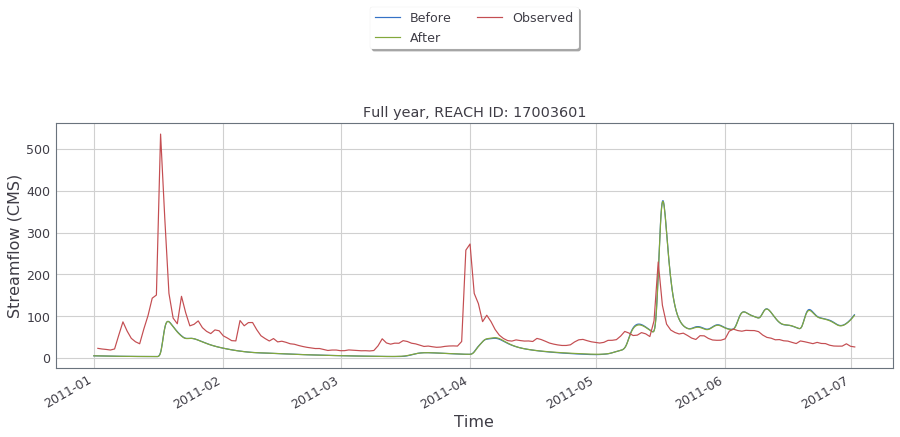

In [17]:
starttime1 = '2011-01-01'
endtime1 = '2011-07-01'

#Streamflow
routebefore = xr.open_dataset(routebeforefile).set_index(sSeg = 'reachID')
routeafter = xr.open_dataset(routeafterfile).set_index(sSeg = 'reachID')

#PLOT 1
plt.figure(figsize=(pltwidth,pltheight))
routebefore.sel(sSeg = sid)['IRFroutedRunoff'].loc[starttime1:endtime1].plot(label='Before')
routeafter.sel(sSeg = sid)['IRFroutedRunoff'].loc[starttime1:endtime1].plot(label='After')
(obs['flow'].loc[starttime1:endtime1]).plot(label='Observed')
plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.title('Full year, REACH ID: %i' %sid)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=2, fancybox=True, shadow=True)
plt.show()